In [316]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [317]:
data = pd.read_csv('ratings_sample.csv')
data = data.drop('overview', axis=1)
data = data.drop('user_id', axis=1)

In [318]:
data.head()

,movie_id,rating,genres,production_companies,production_countries,release_year
0,gods+and+monsters+1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998.0
1,stargate+1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994.0
2,toy+story+1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995.0
3,friends+with+benefits+2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,2011.0
4,sleeper+1973,4,Comedy Romance Science Fiction,Rollins-Joffe Productions,United States of America,1973.0


In [319]:
data.shape

(1998, 6)

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              1998 non-null   object 
 1   rating                1998 non-null   int64  
 2   genres                1996 non-null   object 
 3   production_companies  1985 non-null   object 
 4   production_countries  1994 non-null   object 
 5   release_year          1998 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 93.8+ KB


In [321]:
data.dropna(inplace=True)
data.head(5)

,movie_id,rating,genres,production_companies,production_countries,release_year
0,gods+and+monsters+1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998.0
1,stargate+1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994.0
2,toy+story+1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995.0
3,friends+with+benefits+2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,2011.0
4,sleeper+1973,4,Comedy Romance Science Fiction,Rollins-Joffe Productions,United States of America,1973.0


In [322]:
data['release_year'] = data['release_year'].astype(int)

In [323]:
data["production_companies"].nunique()

820

In [324]:
production_companies = data["production_companies"].value_counts()
production_companies.head(5)

production_companies
Paramount Pictures                          82
Warner Bros.                                33
Twentieth Century Fox Film Corporation      30
Columbia Pictures                           29
Imagine Entertainment Universal Pictures    24
Name: count, dtype: int64

In [325]:
data["production_countries"].nunique()

104

In [326]:
production_countries = data["production_countries"].value_counts()
production_countries.head(5)

production_countries
United States of America                   1452
United Kingdom United States of America     128
United Kingdom                               54
Germany United States of America             45
France United States of America              33
Name: count, dtype: int64

In [327]:
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud

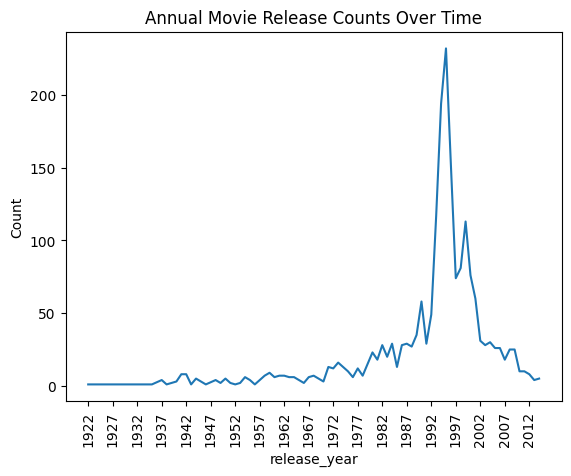

In [328]:
ax = sb.lineplot(data=data['release_year'].value_counts().sort_index())
tick_positions = range(min(data['release_year']), max(data['release_year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("release_year")
ax.set_ylabel("Count")
mpl.show()

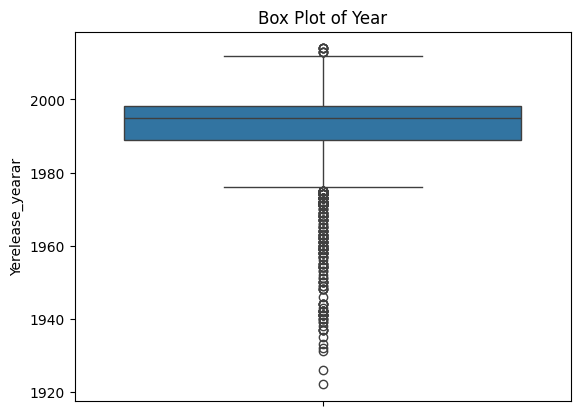

In [329]:
ax = sb.boxplot(data=data, y='release_year')
ax.set_ylabel('Yerelease_yearar')
ax.set_title('Box Plot of Year')
mpl.show()

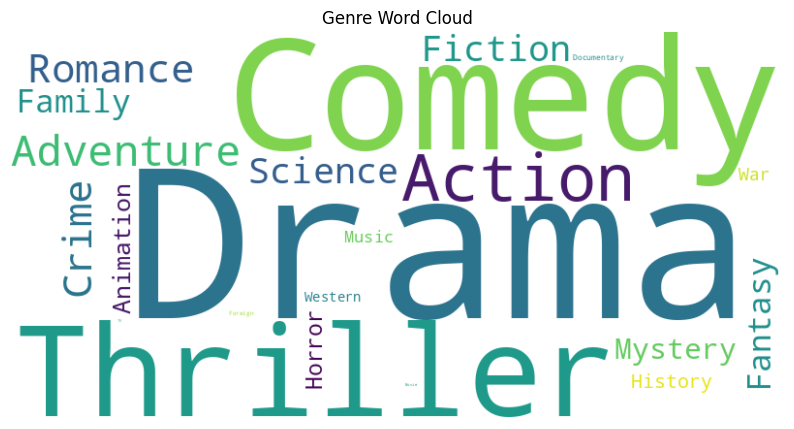

In [330]:
genre_counts = data['genres'].str.split(' ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

mpl.figure(figsize=(10, 6))
mpl.imshow(wordcloud, interpolation='bilinear')
mpl.axis('off')
mpl.title('Genre Word Cloud')
mpl.show()

In [331]:
genre=data['genres']
genre.head(5)

0                               Drama
1    Action Adventure Science Fiction
2             Animation Comedy Family
3                      Romance Comedy
4      Comedy Romance Science Fiction
Name: genres, dtype: object

In [332]:
genres=data['genres'].str.split(' ',expand=True)
genres.head(15)

,0,1,2,3,4,5,6,7
0,Drama,None,None,None,None,None,None,None
1,Action,Adventure,Science,Fiction,None,None,None,None
2,Animation,Comedy,Family,None,None,None,None,None
3,Romance,Comedy,None,None,None,None,None,None
4,Comedy,Romance,Science,Fiction,None,None,None,None
5,Action,Drama,None,None,None,None,None,None
6,Comedy,None,None,None,None,None,None,None
7,Adventure,Action,Thriller,None,None,None,None,None
8,Action,Adventure,Drama,Horror,Science,Fiction,Thriller,Western
9,Thriller,None,None,None,None,None,None,None


In [333]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'genres', 1: 'Count'})
genrePie.head(5)

,genres,Count
0,Drama,119
1,Comedy,100
2,Comedy Drama Romance,69
3,Drama Romance,60
4,Comedy Romance,47


In [334]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 533
Adventure: 449
Animation: 128
Comedy: 665
Crime: 377
Documentary: 7
Drama: 929
Family: 240
Fantasy: 233
Fiction: 303
Foreign: 3
History: 85
Horror: 109
Movie: 1
Music: 65
Mystery: 186
Romance: 380
Science: 303
TV: 1
Thriller: 550
War: 71
Western: 40


In [335]:
genresPie = data['genres'].value_counts()
genresPie.head(15)

genres
Drama                               118
Comedy                               99
Comedy Drama Romance                 67
Drama Romance                        59
Comedy Romance                       47
Drama Crime                          42
Comedy Drama                         41
Action Thriller                      33
Crime Drama                          26
Adventure Action                     25
Adventure Action Science Fiction     25
Crime Drama Thriller                 25
Comedy Crime                         22
Adventure Action Thriller            22
Animation Comedy Family              22
Name: count, dtype: int64

<ipython-input-336-5edd337f6e10>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=genreLabels, rotation = 90)


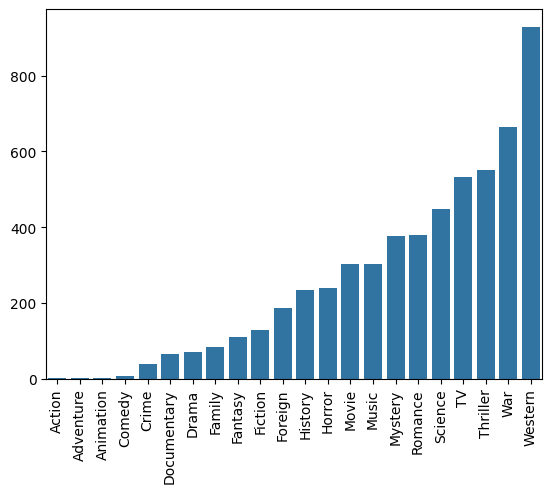

In [336]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sb.barplot(x = genreLabels, y = genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation = 90)
mpl.show()

In [337]:
genrePie.loc[genrePie['Count'] < 50, 'genres'] = 'Other'
ax = px.pie(genrePie, values='Count', names='genres', title='More than one Genre of movies in American Cinema')
ax.show()

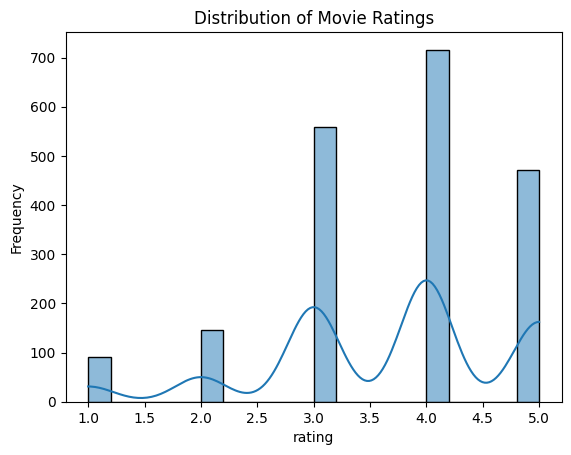

In [338]:
ax = sb.histplot(data = data, x = "rating", bins = 20, kde = True)
ax.set_xlabel('rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
mpl.show()

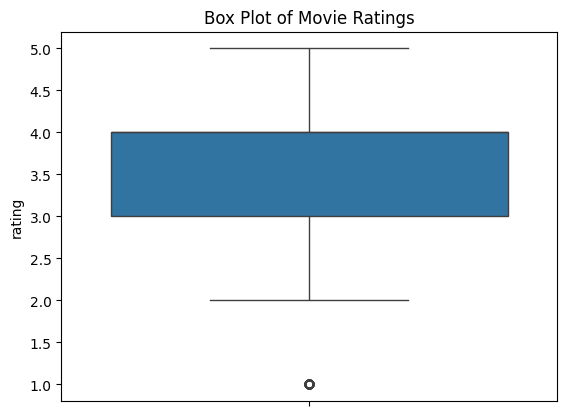

In [339]:
ax = sb.boxplot(data=data, y='rating')
ax.set_ylabel('rating')
ax.set_title('Box Plot of Movie Ratings')
mpl.show()

In [340]:
Q1 = data['rating'].quantile(0.25)
Q3 = data['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['rating'] >= lower_bound) & (data['rating'] <= upper_bound)]
data.head(5)

,movie_id,rating,genres,production_companies,production_countries,release_year
0,gods+and+monsters+1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998
1,stargate+1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994
2,toy+story+1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995
3,friends+with+benefits+2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,2011
4,sleeper+1973,4,Comedy Romance Science Fiction,Rollins-Joffe Productions,United States of America,1973


<ipython-input-341-669a8efeaf10>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-341-669a8efeaf10>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



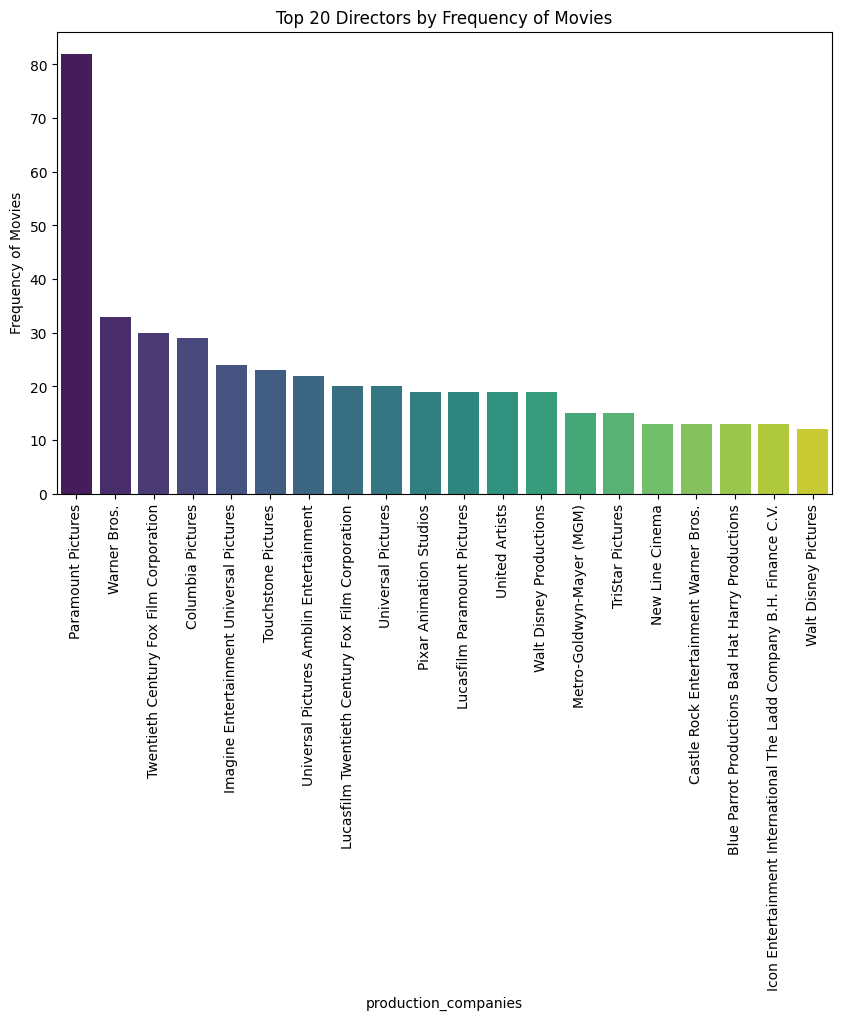

In [341]:
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=production_companies.head(20).index, y=production_companies.head(20).values, palette='viridis')
ax.set_xlabel('production_companies')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()

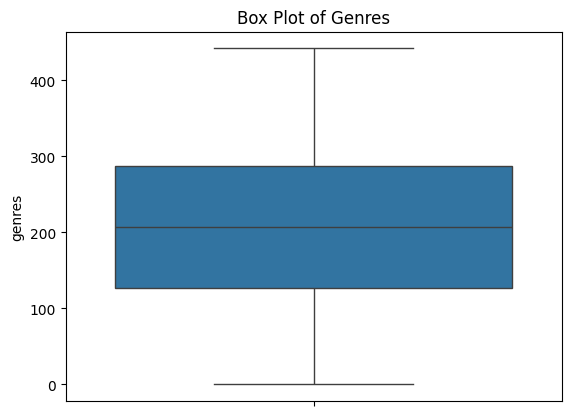

,movie_id,rating,genres,production_companies,production_countries,release_year
0,gods+and+monsters+1998,4,240,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998
1,stargate+1994,3,29,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994
2,toy+story+1995,3,144,Pixar Animation Studios,United States of America,1995
3,friends+with+benefits+2011,4,386,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,2011
4,sleeper+1973,4,206,Rollins-Joffe Productions,United States of America,1973


In [342]:
data["genres"] = data['genres'].astype('category').cat.codes
ax = sb.boxplot(data=data, y='genres')
ax.set_ylabel('genres')
ax.set_title('Box Plot of Genres')
mpl.show()
Q1 = data['genres'].quantile(0.25)
Q3 = data['genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['genres'] >= lower_bound) & (data['genres'] <= upper_bound)]
data.head(5)

In [343]:
print(data.isnull().sum())

movie_id                0
rating                  0
genres                  0
production_companies    0
production_countries    0
release_year            0
dtype: int64


In [344]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1890 entries, 0 to 1997
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_id              1890 non-null   object
 1   rating                1890 non-null   int64 
 2   genres                1890 non-null   int16 
 3   production_companies  1890 non-null   object
 4   production_countries  1890 non-null   object
 5   release_year          1890 non-null   int64 
dtypes: int16(1), int64(2), object(3)
memory usage: 92.3+ KB


In [345]:
data.isna().sum()

movie_id                0
rating                  0
genres                  0
production_companies    0
production_countries    0
release_year            0
dtype: int64

In [346]:
data.head()

,movie_id,rating,genres,production_companies,production_countries,release_year
0,gods+and+monsters+1998,4,240,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998
1,stargate+1994,3,29,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994
2,toy+story+1995,3,144,Pixar Animation Studios,United States of America,1995
3,friends+with+benefits+2011,4,386,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,2011
4,sleeper+1973,4,206,Rollins-Joffe Productions,United States of America,1973


In [347]:
data.describe()

,rating,genres,release_year
count,1890.000000,1890.000000,1890.000000
mean,3.800529,210.083598,1991.423280
std,0.901090,111.723395,13.265768
min,2.000000,0.000000,1922.000000
25%,3.000000,127.000000,1989.000000
50%,4.000000,207.000000,1995.000000
75%,4.000000,287.000000,1999.000000
max,5.000000,442.000000,2014.000000


In [348]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

data[['genres', 'production_companies', 'production_countries', 'release_year']] = imputer.fit_transform(data[['genres', 'production_companies', 'production_countries', 'release_year']])

In [349]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['genres'] = le.fit_transform(data['genres'])
data['production_companies'] = le.fit_transform(data['production_companies'])
data['production_countries'] = le.fit_transform(data['production_countries'])
data['release_year'] = le.fit_transform(data['release_year'])

<Axes: xlabel='genres', ylabel='count'>

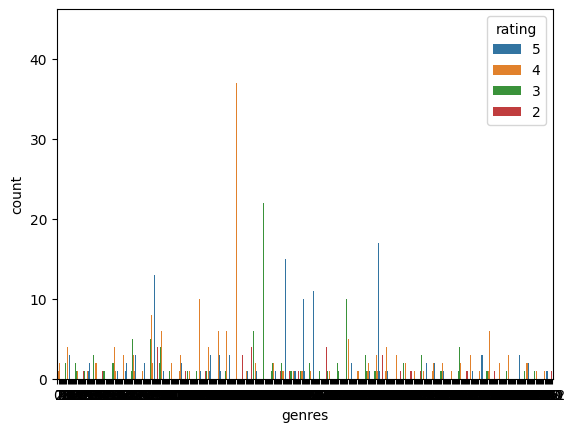

In [350]:
data['rating']=data['rating'].astype(str)
sns.countplot(x=data['genres'],hue=data['rating'])

<function matplotlib.pyplot.show(close=None, block=None)>

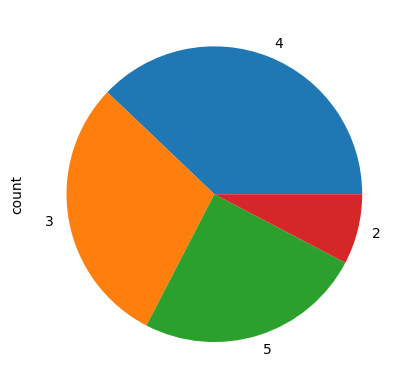

In [351]:
data['rating'].value_counts().plot(kind='pie')
plt.show

array([[<Axes: title={'center': 'genres'}>,
        <Axes: title={'center': 'production_companies'}>],
       [<Axes: title={'center': 'production_countries'}>,
        <Axes: title={'center': 'release_year'}>]], dtype=object)

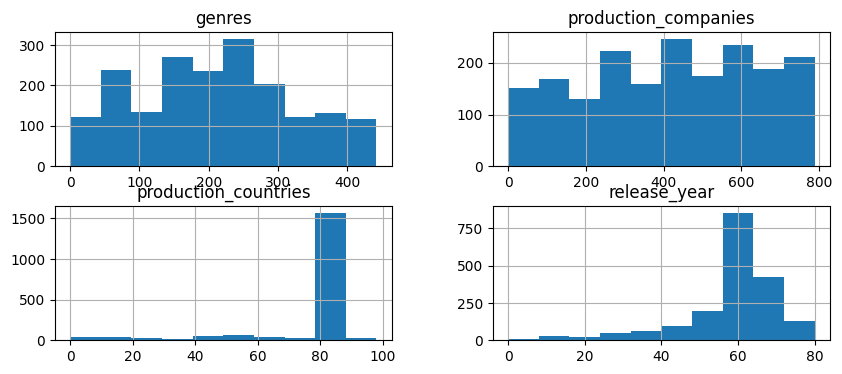

In [352]:
data.hist(figsize=(10,4))

In [353]:
data.head()

,movie_id,rating,genres,production_companies,production_countries,release_year
0,gods+and+monsters+1998,4,240,303,83,64
1,stargate+1994,3,29,75,42,60
2,toy+story+1995,3,144,476,86,61
3,friends+with+benefits+2011,4,386,71,86,77
4,sleeper+1973,4,206,514,86,39


In [354]:
X = data.drop(columns=['rating'])
y = data['rating']

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [356]:
y_train

1530    3
248     5
1737    3
296     4
961     3
       ..
97      4
942     4
1411    4
1668    4
765     4
Name: rating, Length: 1512, dtype: object

In [357]:
y_test

1926    4
1724    5
1541    5
455     5
785     3
       ..
1318    4
1297    3
108     3
1695    4
1122    4
Name: rating, Length: 378, dtype: object

<Axes: >

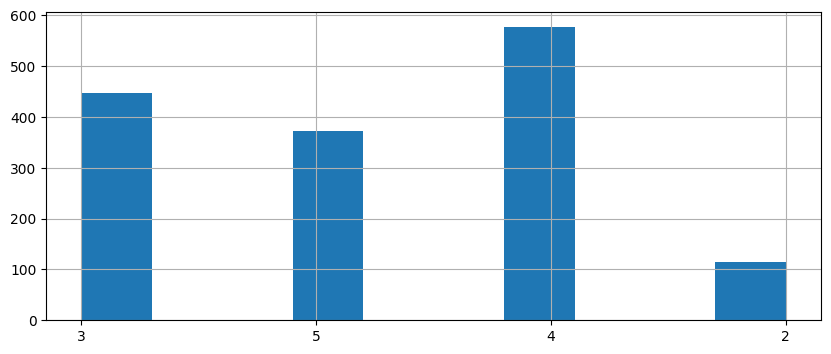

In [358]:
y_train.hist(figsize=(10,4))

<Axes: >

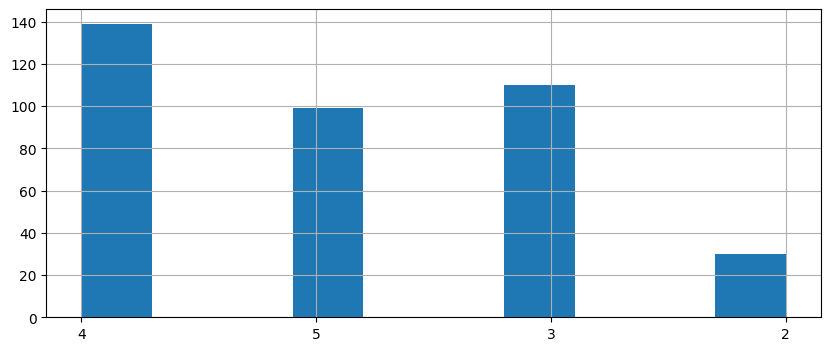

In [359]:
y_test.hist(figsize=(10,4))

In [360]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train[["movie_id", "genres", "production_companies", "production_countries", "release_year"]].astype(str).agg(" ".join, axis=1))
X_test_tfidf = vectorizer.transform(X_test[["movie_id", "genres", "production_companies", "production_countries", "release_year"]].astype(str).agg(" ".join, axis=1))

In [361]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train_tfidf, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [362]:
y_pred = model.predict(X_test_tfidf)

In [363]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8127881673508554


In [364]:
predictions = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred})
print(predictions.head())

     Actual Rating  Predicted Rating
1926             4          3.807398
1724             5          3.755175
1541             5          3.945774
455              5          4.385707
785              3          3.765807


In [365]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.026705906724217687

In [366]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.7377169901731784
